# ASSIGNMENT 4

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Load the data set

In [3]:
df=pd.read_csv("Mall_Customers.csv")

Displaying data frame

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Perform Below Visualizations

1.Univariate Analysis

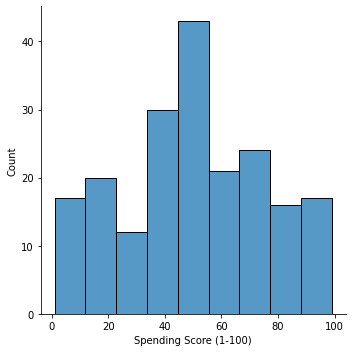

In [ ]:
sb.displot(df["Spending Score (1-100)"])

2.Bivariate Analysis

In [ ]:
c1=df["Age"]
c2=df["CustomerID"]

<BarContainer object of 200 artists>

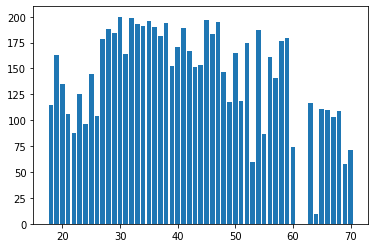

In [ ]:
plt.bar(c1,c2)

3.Multivariate Analysis

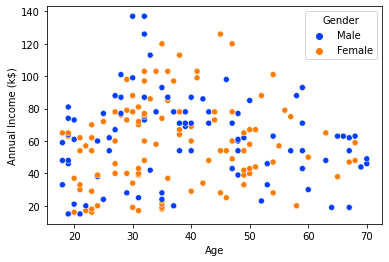

In [ ]:
sb.scatterplot(
    x='Age',
    y='Annual Income (k$)', 
    data=df,
    palette='bright',
    hue='Gender');

Perform descriptive statistics on the dataset

Measure of Central Tendency

1.Mean

In [ ]:
df.mean(numeric_only=True)

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

2.Median

In [ ]:
df.median(numeric_only=True)

CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

3.Count

In [ ]:
df.count(numeric_only=True)

CustomerID                200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

4.Standard Deviation

In [ ]:
df.std(numeric_only=True)

CustomerID                57.879185
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

Handle the Missing values

In [ ]:
df.isnull().sum()                      #no missing values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Find the outliers and replace the outliers

In [ ]:
sorted(df["Age"])
quantile1,quantile3=np.percentile(df["Age"],[25,75])

In [ ]:
quantile1,quantile3

(28.75, 49.0)

In [ ]:
iqr=quantile3-quantile1
lower_bound=quantile1-(1.5*iqr)
upper_bound=quantile3+(1.5*iqr)
print(lower_bound,upper_bound)

-1.625 79.375


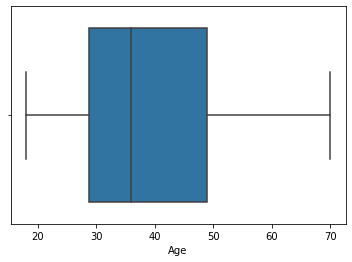

In [ ]:
sb.boxplot(x=df["Age"])

Check for Categorical columns and perform encoding

In [4]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df["Gender"].replace({"Female":0,"Male":1},inplace = True)

In [5]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Scaling the data

In [7]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled)


In [8]:
df_scaled.head()

,0,1,2,3,4
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980


Clustering

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 31.01639344   0.39344262  36.91803279  30.36065574  49.73770492]
 [166.5          0.45588235  36.04411765  88.91176471  50.20588235]
 [ 96.98591549   0.46478873  43.1971831   59.35211268  50.5915493 ]]


Split data into Dependent and Independent variables

In [10]:
k= df.iloc[:,:-1].values
g= df.iloc[:,3].values

In [11]:
k

array([[  1,   1,  19,  15],
       [  2,   1,  21,  15],
       [  3,   0,  20,  16],
       [  4,   0,  23,  16],
       [  5,   0,  31,  17],
       [  6,   0,  22,  17],
       [  7,   0,  35,  18],
       [  8,   0,  23,  18],
       [  9,   1,  64,  19],
       [ 10,   0,  30,  19],
       [ 11,   1,  67,  19],
       [ 12,   0,  35,  19],
       [ 13,   0,  58,  20],
       [ 14,   0,  24,  20],
       [ 15,   1,  37,  20],
       [ 16,   1,  22,  20],
       [ 17,   0,  35,  21],
       [ 18,   1,  20,  21],
       [ 19,   1,  52,  23],
       [ 20,   0,  35,  23],
       [ 21,   1,  35,  24],
       [ 22,   1,  25,  24],
       [ 23,   0,  46,  25],
       [ 24,   1,  31,  25],
       [ 25,   0,  54,  28],
       [ 26,   1,  29,  28],
       [ 27,   0,  45,  28],
       [ 28,   1,  35,  28],
       [ 29,   0,  40,  29],
       [ 30,   0,  23,  29],
       [ 31,   1,  60,  30],
       [ 32,   0,  21,  30],
       [ 33,   1,  53,  33],
       [ 34,   1,  18,  33],
       [ 35,  

In [12]:
g

array([ 15,  15,  16,  16,  17,  17,  18,  18,  19,  19,  19,  19,  20,
        20,  20,  20,  21,  21,  23,  23,  24,  24,  25,  25,  28,  28,
        28,  28,  29,  29,  30,  30,  33,  33,  33,  33,  34,  34,  37,
        37,  38,  38,  39,  39,  39,  39,  40,  40,  40,  40,  42,  42,
        43,  43,  43,  43,  44,  44,  46,  46,  46,  46,  47,  47,  48,
        48,  48,  48,  48,  48,  49,  49,  50,  50,  54,  54,  54,  54,
        54,  54,  54,  54,  54,  54,  54,  54,  57,  57,  58,  58,  59,
        59,  60,  60,  60,  60,  60,  60,  61,  61,  62,  62,  62,  62,
        62,  62,  63,  63,  63,  63,  63,  63,  64,  64,  65,  65,  65,
        65,  67,  67,  67,  67,  69,  69,  70,  70,  71,  71,  71,  71,
        71,  71,  72,  72,  73,  73,  73,  73,  74,  74,  75,  75,  76,
        76,  77,  77,  77,  77,  78,  78,  78,  78,  78,  78,  78,  78,
        78,  78,  78,  78,  79,  79,  81,  81,  85,  85,  86,  86,  87,
        87,  87,  87,  87,  87,  88,  88,  88,  88,  93,  93,  9

Split data into training and testing

In [14]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
a, b = make_blobs(n_samples=1001)

In [15]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.5)
print(a_train.shape, a_test.shape, b_train.shape, b_test.shape)

(500, 2) (501, 2) (500,) (501,)


Building a model,Training and Testing

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 2)
knn.fit(a_train,b_train)

KNeighborsClassifier(n_neighbors=2)

In [17]:
p = knn.predict(a_test)

In [18]:
p

array([0, 1, 2, 2, 0, 1, 0, 0, 1, 0, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0,
       1, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 0, 1, 0, 0, 1, 0, 2, 2,
       1, 1, 0, 2, 2, 0, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 0,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 0, 2, 2, 0, 1, 1, 0, 1, 2, 0, 0,
       1, 2, 0, 1, 1, 1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 1, 1, 2, 2, 1, 1,
       1, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 2, 2, 1, 1, 1, 0, 2, 0, 1, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2,
       0, 1, 0, 0, 1, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1,
       1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1,
       2, 0, 2, 0, 0, 1, 0, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 0, 1, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 1, 1,
       1, 1, 1, 0, 2, 1, 2, 0, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 0, 0, 2, 0,
       0, 0, 2, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 1, 0, 1, 2, 2, 1, 1,
       1, 2, 2, 0, 1, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0,

Accuracy

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy score",accuracy_score(b_test,p))

Accuracy score 0.998003992015968


In [21]:
confusion_matrix(b_test,p)

array([[157,   0,   0],
       [  1, 170,   0],
       [  0,   0, 173]])